In [1]:
import torchvision
import torch
import torchvision.transforms as transforms
import os 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir('./')

['.ipynb_checkpoints',
 'Calculating Mean and STD.ipynb',
 'Data Preparation.ipynb',
 'Neural Network Training.ipynb',
 'Test Set',
 'Training Set']

In [3]:
training_dataset_path = './Training Set'
test_dataset_path = './Test Set'

In [4]:
mean = [0.4243, 0.4522, 0.5050] # Make this dynamic later
std = [0.2150, 0.2035, 0.1913]

training_transforms = transforms.Compose([
    transforms.Resize((224,224)), # Tweak this later on to determine best size
    transforms.RandomHorizontalFlip(), # Depends on the data, experiment here again
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])
test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

In [5]:
training_dataset = torchvision.datasets.ImageFolder(root = training_dataset_path, transform = training_transforms)
test_dataset = torchvision.datasets.ImageFolder(root = test_dataset_path, transform = test_transforms)

In [6]:
def show_transformed_images(dataset): # Func declaration
    loader = torch.utils.data.DataLoader(dataset, batch_size=6, shuffle=True) # Loads data
    batch = next(iter(loader)) # Gets the next batch in sequence from loader
    images, labels = batch # Assings images and labels to batch tuple (images, labels)
    
    grid = torchvision.utils.make_grid(images, nrow=3) # Creates a grid of 3 rows to display images
    plt.figure(figsize=(11,11)) # Defines an figure size of 11x11
    plt.imshow(np.transpose(grid, (1,2,0))) # changes order of dimensions of the grid tensor to account for differences between PyTorch and Matplotlib
    print('labels:', labels) # prints image labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: tensor([0, 4, 0, 1, 4, 3])


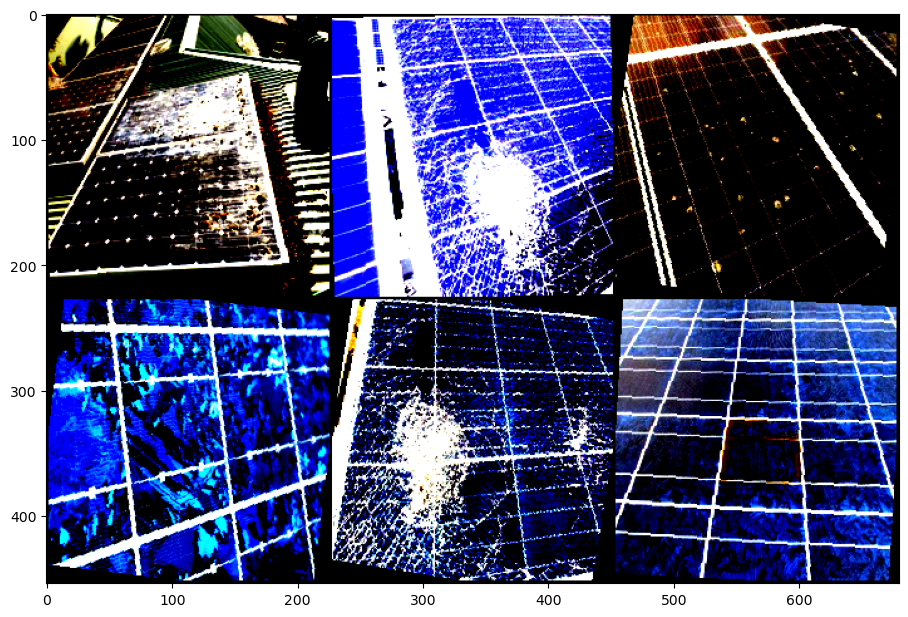

In [7]:
show_transformed_images(training_dataset)

In [8]:
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=32, shuffle=True) # shuffled for better generalization
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False) # Not shuffled since actual comparison data